In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

%matplotlib inline

In [2]:
dados=pd.read_csv('C:/Users/u4b8/Documents/Raphael/Mestrado/DS/Projeto_final/Jupyters/tabelao_rev1.csv')
dados=dados.drop(['Unnamed: 0','ano','mes','AISP','População','RISP'],axis=1)

# Separando os dados em trainamento e teste
dados_train,dados_test = train_test_split(dados, test_size=0.5, random_state=42)


In [3]:
#padronizando  (média=0 e desvio padrao=1)
colunas1=list(dados_train)
colunas2=list(dados_test)

scaler = StandardScaler()
dados_train_array =scaler.fit_transform(dados_train)
dados_test_array =scaler.fit_transform(dados_test)

# Revertendo para DataFrame 
dados_train_pad=pd.DataFrame(dados_train_array)
dados_train_pad.set_axis(colunas1,axis='columns')

dados_test_pad=pd.DataFrame(dados_test_array)
dados_test_pad.set_axis(colunas2,axis='columns')


# Separando os preditores das variáveis dependentes
x_train=dados_train_pad.drop(['letalidade_violenta','roubo_veiculo','roubo_transeunte','roubo_em_coletivo','sequestro_relampago'],axis=1)
x_test=dados_test_pad.drop(['letalidade_violenta','roubo_veiculo','roubo_transeunte','roubo_em_coletivo','sequestro_relampago'],axis=1)

train_crime_1=dados_train_pad['roubo_transeunte']
train_crime_2=dados_train_pad['letalidade_violenta']
train_crime_3=dados_train_pad['roubo_veiculo']
train_crime_4=dados_train_pad['roubo_em_coletivo']
train_crime_5=dados_train_pad['sequestro_relampago']

train_crime=train_crime_2

test_crime_1=dados_test_pad['roubo_transeunte']
test_crime_2=dados_test_pad['letalidade_violenta']
test_crime_3=dados_test_pad['roubo_veiculo']
test_crime_4=dados_test_pad['roubo_em_coletivo']
test_crime_5=dados_test_pad['sequestro_relampago']

test_crime=test_crime_2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.
  


In [4]:
# Método 1 - Regressão linear utilizando o métod de regularização (Ridge)

x_train_2=x_train.values
y_train_2=train_crime

x_test_2=x_test.values
y_test_2=test_crime

kf = KFold(n_splits=5)

m=x_train_2
n=y_train_2
kf.split(x_train_2)

lambdas = [.00001, .005, 1,2,3,4, 5, 10, 50, 100, 500, 1000]

score_m=[]

train_index=[]
test_index=[]
for i in lambdas:
    RL_ridge = Ridge(alpha=i, fit_intercept=True)
    for train_index, valid_index in kf.split(m):
        score=[]
        a_train, a_valid = m[train_index], m[valid_index]
        p_train, p_valid = n[train_index], n[valid_index]        
        RL_ridge.fit(a_train,p_train)
        aux=RL_ridge.score(a_valid,p_valid)
        score.append(aux)
        aux_m=sum(score)/len(score)
    score_m.append(aux_m)

print('Rigde =',score_m,)

Rigde = [0.4159655563326279, 0.4159664704735825, 0.4161259856394095, 0.4162468397036113, 0.41633570903037265, 0.41639842932800997, 0.41643955222487955, 0.4164251386164051, 0.41331419931642516, 0.4091909477017507, 0.38567155085572713, 0.3631657884755761]


In [5]:
RL_ridge = Ridge(alpha=5, fit_intercept=True)
RL_ridge.fit(x_train_2,y_train_2)

R2_train=RL_ridge.score(x_train_2,y_train_2)
R2_test=RL_ridge.score(x_test_2,y_test_2)
print('R2_train=',R2_train,'R2_test=',R2_test)

R2_train= 0.4343786676388518 R2_test= 0.44388576916645844


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  if sys.path[0] == '':


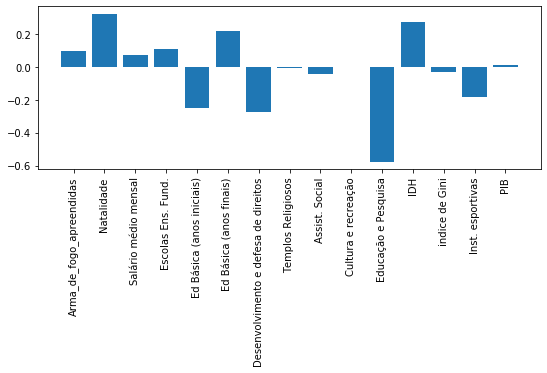

In [6]:
RL_ridge_parameter=list(RL_ridge.coef_)
fig, ax =plt.subplots(1,1,figsize=(9,3))


ax.bar(list(range(15)),RL_ridge_parameter)

ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax.set_xticklabels(list(x_train),rotation=90)

#ax.legend(loc='best')

plt.tight_layout()


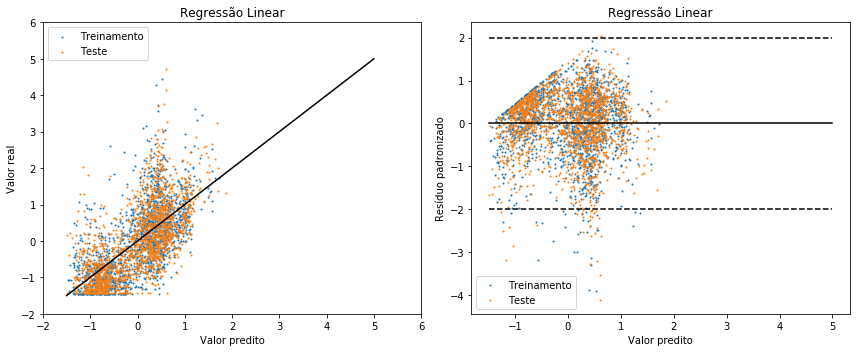

In [7]:
pred_train=RL_ridge.predict(x_train_2)
pred_test=RL_ridge.predict(x_test_2)

res_train=(pred_train-train_crime.values)/train_crime.std()
res_test=(pred_test-test_crime.values)/test_crime.std()

fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].scatter(pred_train,train_crime,s=1,label='Treinamento')
ax[0].scatter(pred_test,test_crime,s=1,label='Teste')
ax[0].plot([-1.5,5],[-1.5,5],color='black')
ax[0].set_xlim([-2, 6])
ax[0].set_ylim([-2, 6])
ax[0].legend(loc='best')
ax[0].set_ylabel('Valor real')
ax[0].set_xlabel('Valor predito')
ax[0].set_title('Regressão Linear')

ax[1].scatter(pred_train,res_train,s=1,label='Treinamento')
ax[1].scatter(pred_test,res_test,s=1,label='Teste')
ax[1].plot([-1.5,5],[0,0],color='black')
ax[1].plot([-1.5,5],[2,2],color='black',linestyle='--')
ax[1].plot([-1.5,5],[-2,-2],color='black',linestyle='--')
ax[1].legend(loc='best')
ax[1].set_ylabel('Resíduo padronizado')
ax[1].set_xlabel('Valor predito')
ax[1].set_title('Regressão Linear')

fig.savefig('RL.png', dpi=fig.dpi, bbox_inches='tight')

plt.tight_layout()


In [8]:
# Método 2 - KNN
x_train_4=x_train.values
y_train_4=train_crime

x_test_4=x_test.values
y_test_4=test_crime

kf = KFold(n_splits=5)

m=x_train_4
n=y_train_4
kf.split(x_train_4)

k=[1,2,3,4,5,6,7,8,9,10,15,20,25,50,100,200,300,400,500]

score_mknn=[]
for i in k:
    knn = KNeighborsRegressor(n_neighbors=i)
    scoreknn=[]
    for train_index, valid_index in kf.split(m):
        a_train, a_valid = m[train_index], m[valid_index]
        p_train, p_valid = n[train_index], n[valid_index]
        knn.fit(a_train,p_train)
        aux7=knn.score(a_valid,p_valid)
        scoreknn.append(aux7)
    aux_mknn=sum(scoreknn)/len(scoreknn)
    score_mknn.append(aux_mknn)

#print('KNN =',score_mknn)

knn =KNeighborsRegressor(n_neighbors=9)
knn.fit(x_train_4,y_train_4)
R2_train=knn.score(x_train_4,y_train_4)
R2_test=knn.score(x_test_4,y_test_4)
print('R2_train=',R2_train,'R2_test=',R2_test)

R2_train= 0.6308266109227207 R2_test= 0.5592924791119931


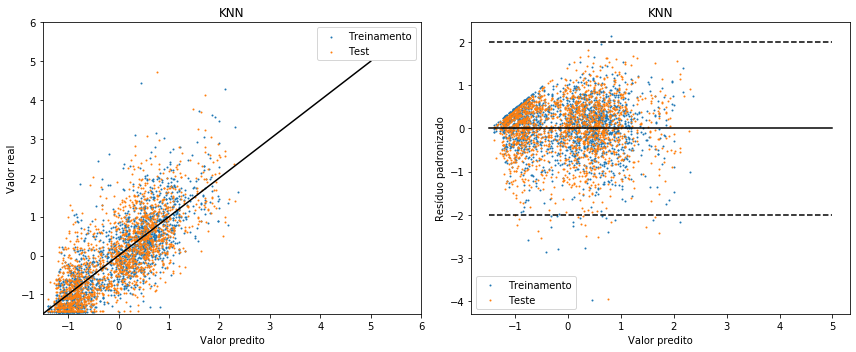

In [9]:
knn_pred_train=knn.predict(x_train_4)
knn_pred_test=knn.predict(x_test_4)

knn_res_train=(knn_pred_train-train_crime.values)/train_crime.std()
knn_res_test=(knn_pred_test-test_crime.values)/test_crime.std()

fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].scatter(knn_pred_train,train_crime,s=1,label='Treinamento')
ax[0].scatter(knn_pred_test,test_crime,s=1,label='Test')
ax[0].plot([-1.5,5],[-1.5,5],color='black')
ax[0].set_xlim([-1.5, 6])
ax[0].set_ylim([-1.5, 6])
ax[0].legend(loc='best')
ax[0].set_ylabel('Valor real')
ax[0].set_xlabel('Valor predito')
ax[0].set_title('KNN')

ax[1].scatter(knn_pred_train,knn_res_train,s=1,label='Treinamento')
ax[1].scatter(knn_pred_test,knn_res_test,s=1,label='Teste')
ax[1].plot([-1.5,5],[0,0],color='black')
ax[1].plot([-1.5,5],[2,2],color='black',linestyle='--')
ax[1].plot([-1.5,5],[-2,-2],color='black',linestyle='--')
ax[1].legend(loc='best')
ax[1].set_ylabel('Resíduo padronizado')
ax[1].set_xlabel('Valor predito')
ax[1].set_title('KNN')

fig.savefig('knn.png', dpi=fig.dpi, bbox_inches='tight')

plt.tight_layout()

In [10]:
# Método 3 - Conjunto (Ensemble) de Árvores de decisão 
x_train_5=x_train.values
y_train_5=train_crime

x_test_5=x_test.values
y_test_5=test_crime

ntrees = 2000
estimators = []
R2s_train = []
R2s_test = []
tree_pred_train = np.zeros((x_test_5.shape[0], ntrees))
tree_pred_test = np.zeros((x_test_5.shape[0], ntrees))
for i in range(ntrees):
    simpletree = DecisionTreeRegressor(max_depth=5)
    boot_xx, boot_y = resample(x_train_5, y_train_5)
    estimators = np.append(estimators,simpletree.fit(boot_xx, boot_y))
    tree_pred_train[:,i] = simpletree.predict(x_train_5)
    tree_pred_test[:,i] = simpletree.predict(x_test_5)
    R2s_test = np.append(R2s_test,simpletree.score(x_test_5,y_test_5))
    R2s_train = np.append(R2s_train,simpletree.score(x_train_5,y_train_5))

tree_pred_train=tree_pred_train.mean(axis=1)
tree_pred_test=tree_pred_test.mean(axis=1)

tree_res_train=(tree_pred_train-train_crime.values)/train_crime.std()
tree_res_test=(tree_pred_test-test_crime.values)/test_crime.std()
print('R2_train=',R2s_train.mean(),'R2_test=',R2s_test.mean())


R2_train= 0.5356851457101559 R2_test= 0.3659184632761443


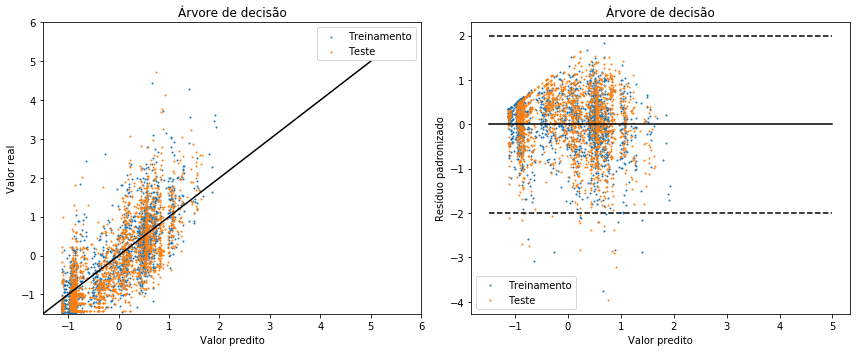

In [11]:
fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].scatter(tree_pred_train,train_crime,s=1,label='Treinamento')
ax[0].scatter(tree_pred_test,test_crime,s=1,label='Teste')
ax[0].plot([-1.5,5],[-1.5,5],color='black')
ax[0].set_xlim([-1.5, 6])
ax[0].set_ylim([-1.5, 6])
ax[0].legend(loc='best')
ax[0].set_ylabel('Valor real')
ax[0].set_xlabel('Valor predito')
ax[0].set_title('Árvore de decisão')

ax[1].scatter(tree_pred_train,tree_res_train,s=1,label='Treinamento')
ax[1].scatter(tree_pred_test,tree_res_test,s=1,label='Teste')
ax[1].plot([-1.5,5],[0,0],color='black')
ax[1].plot([-1.5,5],[2,2],color='black',linestyle='--')
ax[1].plot([-1.5,5],[-2,-2],color='black',linestyle='--')
ax[1].legend(loc='best')
ax[1].set_ylabel('Resíduo padronizado')
ax[1].set_xlabel('Valor predito')
ax[1].set_title('Árvore de decisão')

fig.savefig('arvore.png', dpi=fig.dpi, bbox_inches='tight')

plt.tight_layout()

R2_train= 0.35128395121022604 R2_test= 0.16864016233662948


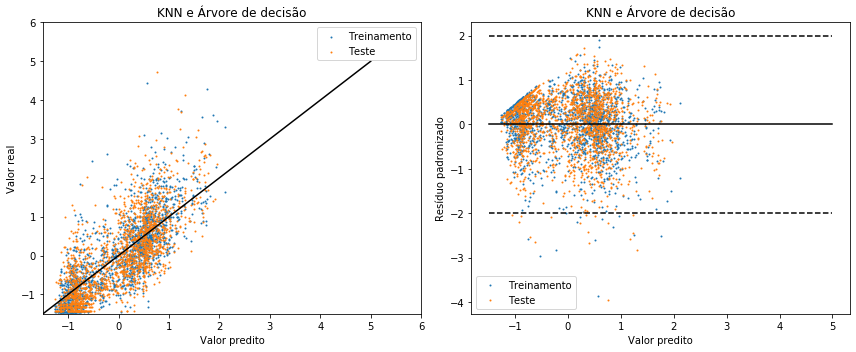

In [12]:
conj_pred_train=(knn_pred_train+tree_pred_train)/2
conj_pred_test=(knn_pred_test+tree_pred_test)/2

conj_res_train=(conj_pred_train-train_crime.values)/train_crime.std()
conj_res_test=(conj_pred_test-test_crime.values)/test_crime.std()


fig, ax = plt.subplots(1,2,figsize=(12,5))

ax[0].scatter(conj_pred_train,train_crime,s=1,label='Treinamento')
ax[0].scatter(conj_pred_test,test_crime,s=1,label='Teste')
ax[0].plot([-1.5,5],[-1.5,5],color='black')
ax[0].set_xlim([-1.5, 6])
ax[0].set_ylim([-1.5, 6])
ax[0].legend(loc='best')
ax[0].set_ylabel('Valor real')
ax[0].set_xlabel('Valor predito')
ax[0].set_title('KNN e Árvore de decisão')

ax[1].scatter(conj_pred_train,conj_res_train,s=1,label='Treinamento')
ax[1].scatter(conj_pred_test,conj_res_test,s=1,label='Teste')
ax[1].plot([-1.5,5],[0,0],color='black')
ax[1].plot([-1.5,5],[2,2],color='black',linestyle='--')
ax[1].plot([-1.5,5],[-2,-2],color='black',linestyle='--')
ax[1].legend(loc='best')
ax[1].set_ylabel('Resíduo padronizado')
ax[1].set_xlabel('Valor predito')
ax[1].set_title('KNN e Árvore de decisão')

plt.tight_layout()

R2_conj_train=r2_score(conj_pred_train,train_crime.values)
R2_conj_test=r2_score(conj_pred_test,test_crime.values)

fig.savefig('comb.png', dpi=fig.dpi, bbox_inches='tight')

print('R2_train=',R2_conj_train,'R2_test=',R2_conj_test)